<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ML/blob/master/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#import scoring and report metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# print type for the data and labels
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [7]:
iris.data.shape

(150, 4)

In [8]:
# print labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# perform EDA
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
print(df.groupby(iris.target).size())

0    50
1    50
2    50
dtype: int64


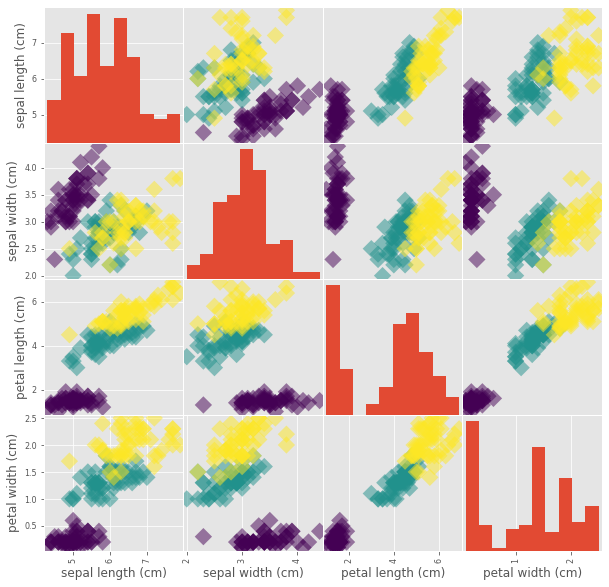

In [12]:
# visual EDA
graphs = pd.plotting.scatter_matrix(df, c = Y, figsize = [10,10], s = 150, marker = 'D')

In [13]:
test_set_size = 0.2
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_set_size, random_state = seed)

In [14]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
results = []
names = []

#loop through models and train
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

In [15]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
predictions = knn.predict(x_test)
score_knn = accuracy_score(y_test, predictions)
print(score_knn)

0.9


In [17]:
# print confusion matrix and classification report
conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix\n", conf_mat)
class_rep = classification_report(y_test, predictions)
print("Classification Report\n", class_rep)

Confusion Matrix
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [18]:
svm = SVC(gamma = 'auto')
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
predictions2 = svm.predict(x_test)
score_svm = accuracy_score(y_test, predictions2)
print(score_svm)

0.9333333333333333


In [20]:
# print confusion matrix and classification report
conf_mat2 = confusion_matrix(y_test, predictions2)
print("Confusion Matrix\n", conf_mat)
class_rep2 = classification_report(y_test, predictions2)
print("Classification Report\n", class_rep2)

Confusion Matrix
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

